**Load and inspection** 

In [1]:
import pandas as pd

pd.set_option('display.max_columns', None)

listings = pd.read_csv('../Data/listings.csv')
calendar = pd.read_csv('../Data/calendar.csv')
reviews = pd.read_csv('../Data/reviews.csv')

**AIMS OF THIS PROJECT ===> AIR BNB DATA SUMMARY, DALLAS TEXAS**


**Project Goal**
The goal of this project is to better understand and learn from AirBnb information and listings in Dallas, Texas and look out for patterns in pricing, availability and characteristics of different neighborhoods. Using data cleaning, visualization, and segmentation, the project seeks to uncover actionable knowledge for hosts to support pricing strategies, and for guests to facilitate decisioning about where to stay.

**Dataset Description**
The dataset used in this project comes from Inside Airbnb, a publicly available source that provides detailed information about Airbnb listings in various cities. It includes:

Listing-level data such as id, price, neighbourhood, neighbourhood_cleansed, room_type, and availability.

Calendar data detailing daily prices and availability for each listing.

Neighborhood-level summary including the number of listings and their distribution across different price segments.

The dataset captures a snapshot of the Airbnb marketplace in Dallas, enabling exploratory analysis of pricing trends, seasonal patterns, and market segmentation.

**RESEARCH QUESTIONS**
- What is the typical price range of Airbnb listings in the city, and how does it vary by neighborhood?
- Are there patterns in listing prices by day of the week or month of the year?
- Which neighborhoods have the highest and lowest concentrations of listings in different price segments?
- How does removing extreme outliers (e.g., luxury listings) affect the interpretation of pricing data?
- What pricing insights can be derived to guide travelers or hosts in making informed decisions?

**OBJECTIVES**


-  Analyze the distribution of Airbnb listing prices to identify central tendencies and spread.
-  Classify listings into price segments (e.g., budget, mid-range, premium) to support market segmentation.
-  Compare average prices across **days of the week**, **months**, and **neighborhoods**.
-  Visualize key trends using enhanced bar charts, stacked bar charts, and boxplots for clearer communication.
-  Apply statistical techniques (e.g., IQR filtering) to control for skewness and improve data reliability.
-  Generate business-friendly insights for potential stakeholders: hosts, guests, or policymakers.


**Preparing the data for analysis**

In [2]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5349 entries, 0 to 5348
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            5349 non-null   int64  
 1   listing_url                                   5349 non-null   object 
 2   scrape_id                                     5349 non-null   int64  
 3   last_scraped                                  5349 non-null   object 
 4   source                                        5349 non-null   object 
 5   name                                          5349 non-null   object 
 6   description                                   5314 non-null   object 
 7   neighborhood_overview                         2515 non-null   object 
 8   picture_url                                   5349 non-null   object 
 9   host_id                                       5349 non-null   i

In [25]:
listings.head(20)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,61878,https://www.airbnb.com/rooms/61878,20250416205924,2025-04-17,city scrape,MODERN LIVING AND FURNISHINGS,Close to downtown and Uptown. Fast and conven...,Enjoy the heart of Dallas right out your door ...,https://a0.muscache.com/pictures/c4d9625e-bcc5...,300211,https://www.airbnb.com/users/show/300211,Rita,2010-11-26,"Roanoke, TX","""Love is Love"" :)\r\nI'm originally from Flori...",within a few hours,100%,88%,t,https://a0.muscache.com/im/pictures/user/5f63d...,https://a0.muscache.com/im/pictures/user/5f63d...,Oak Lawn,2.0,3.0,"['email', 'phone']",t,t,Neighborhood highlights,District 2,NaN,32.816900,-96.820180,Entire condo,Entire home/apt,3,1.0,1 bath,1.0,2.0,"[""Hot water"", ""Essentials"", ""Carbon monoxide a...",$80.00,30,1125,30,30,1125,1125,30.0,1125.0,NaN,t,2,2,2,261,2025-04-17,56,1,0,155,0,60,4800.0,2010-12-29,2025-01-31,4.71,4.79,4.60,4.85,4.93,4.75,4.78,NaN,f,1,1,0,0,0.32
1,795703,https://www.airbnb.com/rooms/795703,20250416205924,2025-04-17,city scrape,Amazing location walk to Downtown Dallas,***** Over 30% Discounts for stays over 30 day...,Located in Turtle Creek neighborhood steps fro...,https://a0.muscache.com/pictures/miso/Hosting-...,4191322,https://www.airbnb.com/users/show/4191322,Michelle,2012-11-19,"Memphis, TN",I enjoy living in such a invigorating and upbe...,within a few hours,100%,100%,f,https://a0.muscache.com/im/users/4191322/profi...,https://a0.muscache.com/im/users/4191322/profi...,Oak Lawn,2.0,4.0,"['email', 'phone']",t,t,Neighborhood highlights,District 14,NaN,32.803270,-96.809760,Entire condo,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Board games"", ""First aid kit"", ""Hot water"", ...",$243.00,30,365,30,30,365,365,30.0,365.0,NaN,t,19,49,79,258,2025-04-17,71,1,0,248,1,60,14580.0,2013-02-01,2024-07-27,4.85,4.91,4.97,4.91,4.97,4.91,4.76,NaN,f,1,1,0,0,0.48
2,826118,https://www.airbnb.com/rooms/826118,20250416205924,2025-04-17,city scrape,Far North Dallas -- Blue Room,NaN,NaN,https://a0.muscache.com/pictures/96902813/2eab...,804559,https://www.airbnb.com/users/show/804559,Rodney,2011-07-11,"Dallas, TX",Bookmaker (both print and electronic) to major...,within a day,50%,0%,f,https://a0.muscache.com/im/users/804559/profil...,https://a0.muscache.com/im/users/804559/profil...,North Central Dallas,1.0,3.0,"['email', 'phone']",t,t,NaN,District 12,NaN,32.988250,-96.789260,Private room in home,Private room,2,1.0,1 private bath,1.0,1.0,"[""First aid kit"", ""Hot water"", ""Essentials"", ""...",$62.00,7,40,7,7,40,40,7.0,40.0,NaN,t,24,45,74,74,2025-04-17,27,0,0,74,1,0,0.0,2015-07-04,2024-01-31,4.85,4.81,4.74,4.85,4.85,4.8

In [8]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,5.349000e+03,5.349000e+03,5.349000e+03,5348.000000,5348.000000,0.0,5349.000000,5349.000000,5349.000000,4955.000000,...,4580.000000,4580.000000,4580.000000,4580.000000,0.0,5349.000000,5349.000000,5349.000000,5349.000000,4580.000000
mean,8.000170e+17,2.025042e+13,2.745320e+08,78.679319,167.310022,NaN,32.809495,-96.794326,5.064685,1.634612,...,4.814908,4.846251,4.699777,4.713247,NaN,11.945971,11.118714,0.631707,0.042064,2.031443
std,5.154600e+17,0.000000e+00,2.082816e+08,367.043356,804.098304,NaN,0.063709,0.049859,3.519622,0.935195,...,0.397860,0.387130,0.418927,0.430257,NaN,19.937821,19.655397,2.039919,0.503454,2.013975
min,6.187800e+04,2.025042e+13,4.342200e+04,1.000000,1.000000,NaN,32.633790,-96.992697,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,5.397119e+07,2.025042e+13,7.340736e+07,2.000000,2.000000,NaN,32.777241,-96.824077,2.000000,1.000000,...,4.800000,4.850000,4.580000,4.660000,NaN,1.000000,1.000000,0.000000,0.000000,0.480000
50%,9.747332e+17,2.025042e+13,2.416181e+08,6.000000,8.000000,NaN,32.801093,-96.794990,4.000000,1.000000,...,4.940000,4.960000,4.820000,4.820000,NaN,4.000000,3.000000,0.000000,0.000000,1.440000
75%,1.238684e+18,2.025042e+13,4.644622e+08,22.000000,31.000000,NaN,32.824519,-96.771100,6.000000,2.000000,...,5.000000,5.000000,4.970000,4.940000,NaN,14.000000,13.000000,0.000000,0.000000,2.970000
max,1.400164e+18,2.025042e+13,6.898944e+08,3273.000000,8171.000000,NaN,33.015150,-96.481240,16.000000,12.500000,...,5.000000,5.000000,5.000000,5.000000,NaN,107.000000,107.000000,14.000000,8.000000,24.930000


**What are the most and least expensive neighborhoods?**

In [69]:
# Neighbouhoods not stated
no_value_neighbourhood = listings.neighbourhood.isna().sum()
print(no_value_neighbourhood)

2834


In [98]:
# Neighbpourhood groupings

In [97]:
no_value_neighbourhood_c = listings.neighbourhood_cleansed.isna().sum()
print(no_value_neighbourhood_c)

0


In [70]:
listings.neighbourhood_cleansed.isna().sum()

np.int64(0)

In [3]:
# Assigning the dataframe to a variable

new_listings = listings.copy()
#
#Price per listing and neighbourhood
new_listings = new_listings[['id', 'neighbourhood_cleansed', 'price']]

In [4]:
new_listings

,id,neighbourhood_cleansed,price
0,61878,District 2,$80.00
1,795703,District 14,$243.00
2,826118,District 12,$62.00
3,860248,District 9,$44.00
4,1154424,District 14,$92.00
...,...,...,...
5344,1400114682172398772,District 7,$34.00
5345,1400116561623545178,District 2,$931.00
5346,1400119182103034381,District 2,$56.00
5347,1400142526039565510,District 2,$111.00


Visual inspection of distribution of price

In [12]:
#Removing '$' AND ',' from the price variable and making it of type float

In [5]:
new_listings['price'] = new_listings['price'].replace('[\$,]', '', regex=True).str.replace(',', '', regex=True).astype(float)

**Visualizing what the distribution of price looks like from using a histogram and boxplots**

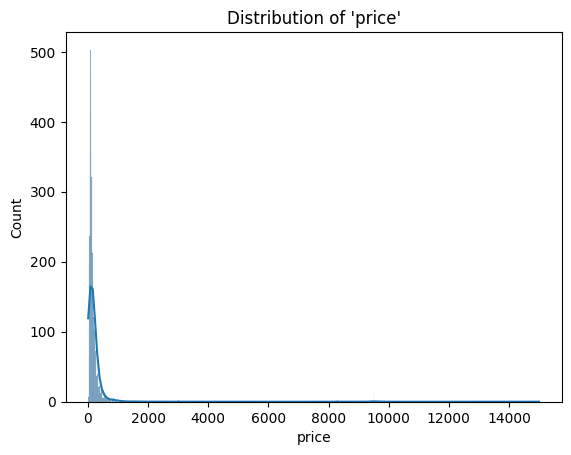

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(new_listings['price'], kde=True)
plt.title("Distribution of 'price'")
plt.show()


Checking skewness and kurtosis

Viewing the outliers

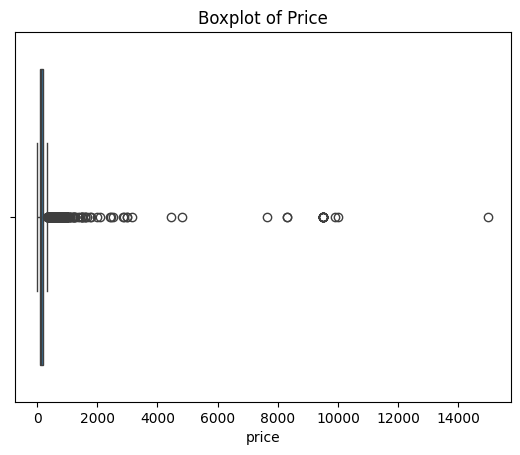

In [7]:
sns.boxplot(x=new_listings['price'])
plt.title('Boxplot of Price')
plt.show()

In [8]:
skew = new_listings['price'].skew()
kurt = new_listings['price'].kurt()

print(f"Skewness: {skew:.2f}")
print(f"Kurtosis: {kurt:.2f}")


Skewness: 14.20
Kurtosis: 226.06


In [10]:
new_listings.to_csv('original_price.csv', index=False)

Dealing with the ouliers using Interquatile range 

In [9]:
def remove_outliers_iqr(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return df[(df[column] >= lower) & (df[column] <= upper)]

listing_no_outliers = remove_outliers_iqr(new_listings, 'price')
 

In [10]:
listing_no_outliers

,id,neighbourhood_cleansed,price
0,61878,District 2,80.0
1,795703,District 14,243.0
2,826118,District 12,62.0
3,860248,District 9,44.0
4,1154424,District 14,92.0
...,...,...,...
5343,1400043657237448273,District 7,67.0
5344,1400114682172398772,District 7,34.0
5346,1400119182103034381,District 2,56.0
5347,1400142526039565510,District 2,111.0


In [13]:
listing_no_outliers.to_csv('filtered_price.csv', index=False)

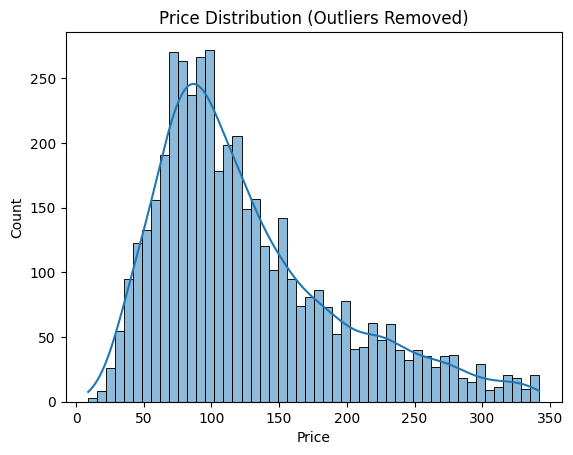

In [11]:
sns.histplot(listing_no_outliers['price'], bins=50, kde=True)
plt.title('Price Distribution (Outliers Removed)')
plt.xlabel('Price')
plt.show()


In [44]:
new_listings.price.isna().sum()

np.int64(393)

In [16]:
listing_no_outliers.price.isna().sum()

np.int64(0)

### Table 1: Listings Including Outliers  
(Used to analyze the full pricing spectrum, including luxury listings)

In [12]:
#**Price categories**


#bins (adjust as needed)
bins = [0, 50, 100, 200, 500, 1000, float('inf')]
labels = ['< $50', '$50–100', '$100–200', '$200–500', '$500–1000', '$1000+']

new_listings['price_group'] = pd.cut(new_listings['price'], bins=bins, labels=labels, include_lowest=True,
    right=False)


# Count by neighbourhood and price group
summary = new_listings.groupby(['neighbourhood_cleansed', 'price_group']).size().unstack(fill_value=0)

df_plot = summary.reset_index()

# Reorder columns to make sure all labels are shown (even if 0)
summary = summary.reindex(columns=labels, fill_value=0)

print(summary)

price_group             < $50  $50–100  $100–200  $200–500  $500–1000  $1000+
neighbourhood_cleansed                                                       
District 1                 45      151       223        56          6       3
District 10                17       62        37        36          8       0
District 11                 9       94       116        46         10       1
District 12                11       61        33        36          2       0
District 13                10       81        52        59         18      11
District 14                12      300       454       184         42      22
District 2                 60      682       543       242         41      15
District 3                  8       26        38        13          2       3
District 4                 20       47        58        31          1       1
District 5                 12       18         7         5          0       0
District 6                 18       56       123        88      

C:\Users\99Street\AppData\Local\Temp\ipykernel_7348\292938805.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = new_listings.groupby(['neighbourhood_cleansed', 'price_group']).size().unstack(fill_value=0)


In [26]:
summary.value_counts()

< $50  $50–100  $100–200  $200–500  $500–1000  $1000+
8      26       38        13        2          3         1
9      94       116       46        10         1         1
10     81       52        59        18         11        1
11     61       33        36        2          0         1
12     18       7         5         0          0         1
       300      454       184       42         22        1
13     40       67        45        6          2         1
17     62       37        36        8          0         1
18     56       123       88        9          4         1
20     47       58        31        1          1         1
34     16       14        16        1          0         1
45     151      223       56        6          3         1
56     36       90        40        1          0         1
60     682      543       242       41         15        1
Name: count, dtype: int64

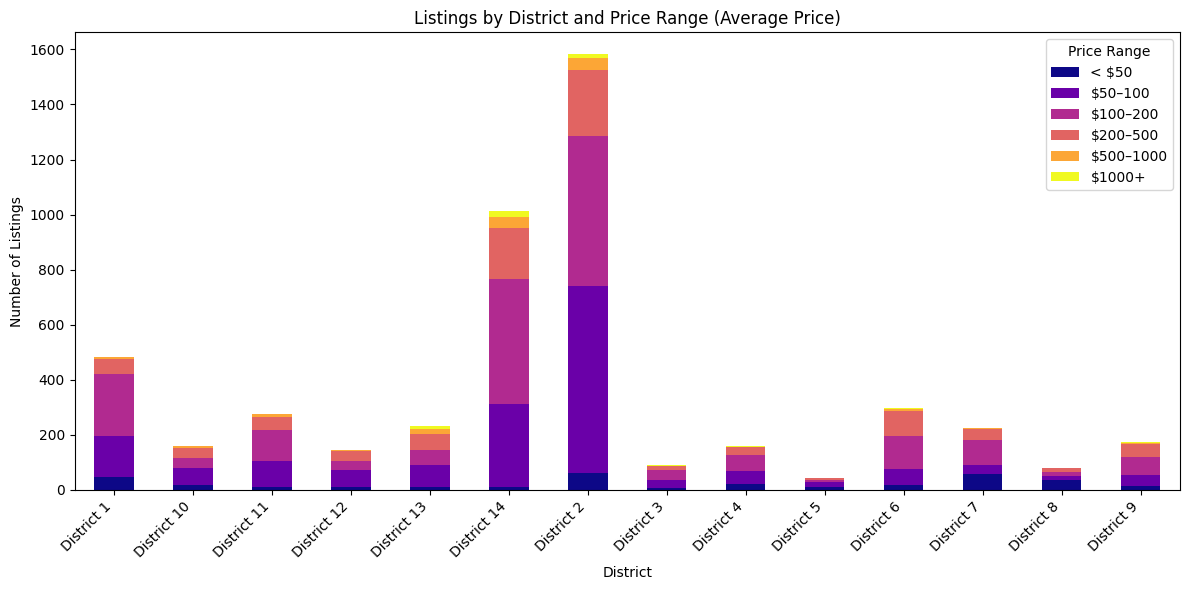

In [13]:
df_plot = df_plot.set_index('neighbourhood_cleansed')

# Plot stacked bar chart
df_plot.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    colormap='plasma'
)

plt.title('Listings by District and Price Range (Average Price)')
plt.xlabel('District')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Price Range')
plt.savefig('Listings_by District_and_Price_Range_raw.png', dpi=300)
plt.tight_layout()

plt.show()


### Table 2: Listings Excluding Outliers  
(Removed high-end outliers using IQR method to control for skewness)

In [14]:
lis = listing_no_outliers.copy()

In [15]:
# Define bins (adjust as needed)
bins = [0, 50, 100, 200, 500, 1000, float('inf')]
labels = ['< $50', '$50–100', '$100–200', '$200–500', '$500–1000', '$1000+']

lis['price_group'] = pd.cut(lis['price'], bins=bins, labels=labels)


In [16]:
# Count how many listings fall into each group
price_counts = lis['price_group'].value_counts().sort_index()
print(lis)


                       id neighbourhood_cleansed  price price_group
0                   61878             District 2   80.0     $50–100
1                  795703            District 14  243.0    $200–500
2                  826118            District 12   62.0     $50–100
3                  860248             District 9   44.0       < $50
4                 1154424            District 14   92.0     $50–100
...                   ...                    ...    ...         ...
5343  1400043657237448273             District 7   67.0     $50–100
5344  1400114682172398772             District 7   34.0       < $50
5346  1400119182103034381             District 2   56.0     $50–100
5347  1400142526039565510             District 2  111.0    $100–200
5348  1400164226695924455             District 1   66.0     $50–100

[4537 rows x 4 columns]


In [17]:
price_group =( lis.groupby(['neighbourhood_cleansed', 'price_group'], observed=True).size().unstack().fillna(0)
              .reindex(['District 1', 'District 2', 'District 3', 'District 4', 'District 5', 'District 6', 'District 7', 'District 8', 'District 9', 'District 10', 'District 11', 'District 12', 'District 13', 'District 14'])  # correct order
             .reset_index())



In [18]:
price_group

price_group,neighbourhood_cleansed,< $50,$50–100,$100–200,$200–500
0,District 1,46,152,222,47
1,District 2,63,687,539,192
2,District 3,10,24,38,11
3,District 4,24,43,58,21
4,District 5,13,17,7,3
5,District 6,20,54,124,65
6,District 7,57,37,89,33
7,District 8,36,14,15,13
8,District 9,15,38,69,33
9,District 10,19,60,38,20


In [195]:
df_plot.to_csv('Listings_by District_and_Price_Range.csv')

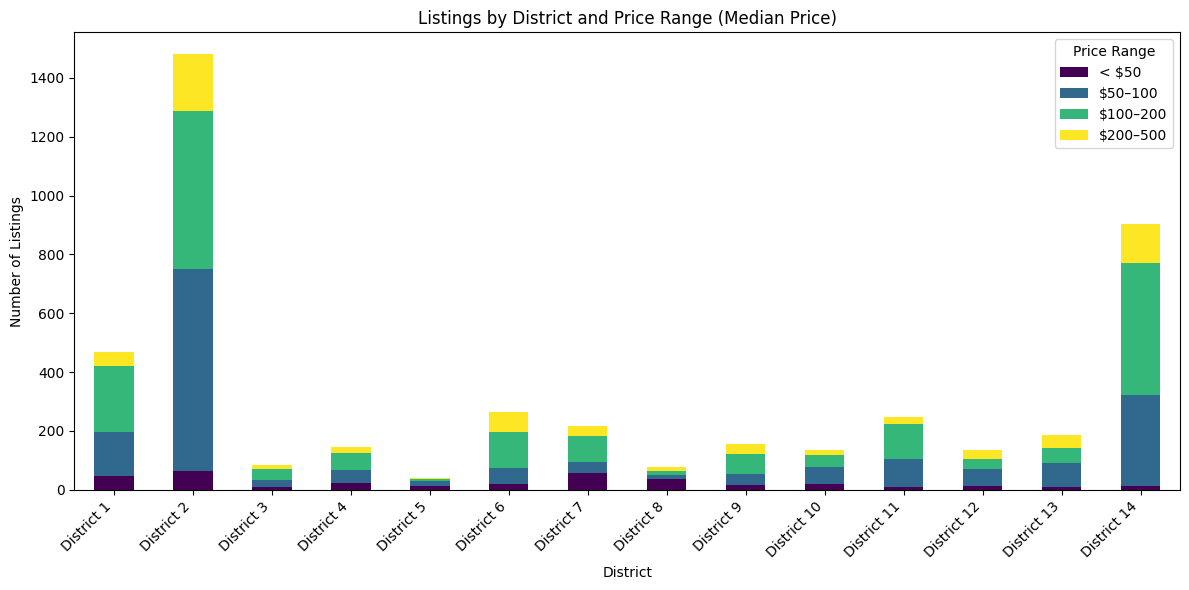

In [19]:
import matplotlib.pyplot as plt

# Set index to neighbourhoods for better plotting
df_plot = price_group.set_index('neighbourhood_cleansed')

# Plot stacked bar chart
df_plot.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    colormap='viridis'
)

plt.title('Listings by District and Price Range (Median Price)')
plt.xlabel('District')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Price Range')
plt.tight_layout()
plt.savefig('Listings_by District_and_Price_Range.png', dpi=300)
plt.show()


# 📊 Analysis & Interpretation

# A. Full Dataset Analysis (With Outliers)

"""
The original dataset provides a comprehensive view of Airbnb listings, capturing the entire pricing spectrum from 
budget to luxury. This broad scope is useful for understanding the complete market landscape, including rare 
high-end accommodations.

Key Insights:
- Luxury Listings Present but Sparse:
  Listings in the 500 – 1000 dollars and $1000+ categories exist but are concentrated in a few districts, especially 
  District 14 and District 2, indicating localized high-end rental markets.

- Mid-Range Dominance:
  The majority of listings are priced between $50–200, suggesting that this is the primary competitive price band 
  for Airbnb hosts.

- Diverse Market in Key Districts:
  Districts such as District 14 and District 2 have listings across all price segments, reflecting broad 
  accommodation diversity.

- Outlier Impact on Metrics:
  The inclusion of extreme high-price listings likely distorts average pricing metrics, potentially leading to 
  misleading interpretations for both travelers and market analysts.
"""

# B. Cleaned Dataset Analysis (Without Outliers)

"""
To reduce skewness and enable a clearer analysis of the typical Airbnb market, listings priced above $500 were 
excluded using the Interquartile Range (IQR) method. This filtered dataset provides a more accurate representation 
of everyday pricing dynamics.

Key Insights:
- Concentration in Core Price Segments:
  The vast majority of listings fall into the 50–100 dollars and $100–200 ranges, reaffirming this band as the market norm 
  for short-term rentals.

- Budget Options by District:
  Neighborhoods like District 2, District 1, and District 7 stand out for their relatively high counts of listings 
  under $50, which may appeal to budget-conscious travelers.

- High Activity Zones Remain Consistent:
  Even after removing outliers, District 2 and District 14 continue to dominate in listing volume, suggesting these 
  are core hubs in the local Airbnb ecosystem.

- Cleaner Statistical Representation:
  By removing extreme values, the dataset becomes more statistically balanced, providing a stronger foundation 
  for price modeling, segmentation, and policy analysis.
"""


**Average cost of homes in neighbourhoods in Dallas grouped by districts**

In [20]:
#Using the mean as Average
grouped = (new_listings.groupby('neighbourhood_cleansed')['price'].mean()
           .reindex(['District 1', 'District 2', 'District 3', 'District 4', 'District 5','District 6', 'District 7', 'District 8', 'District 9', 'District 10', 'District 11', 'District 12', 'District 13', 'District 14'])  # correct order
    .reset_index())


In [21]:
grouped

,neighbourhood_cleansed,price
0,District 1,141.152893
1,District 2,191.758686
2,District 3,189.844444
3,District 4,155.348101
4,District 5,97.309524
5,District 6,278.080537
6,District 7,128.363229
7,District 8,108.518519
8,District 9,231.346821
9,District 10,172.743750


In [22]:
###Using the median as average instead of mean in price analysis in neighbourhoods


justification = """
The median price is preferred over the mean as a measure of central tendency in this analysis because it is robust to the influence of extreme values and outliers,
such as luxury listings with exceptionally high prices. These outliers can disproportionately affect the mean, resulting in a distorted representation of typical listing prices.
The median, by representing the middle value in the price distribution, provides a more accurate and reliable indicator of the typical price that travelers are likely to encounter 
across different neighborhoods.
"""

print(justification)


The median price is preferred over the mean as a measure of central tendency in this analysis because it is robust to the influence of extreme values and outliers,
such as luxury listings with exceptionally high prices. These outliers can disproportionately affect the mean, resulting in a distorted representation of typical listing prices.
The median, by representing the middle value in the price distribution, provides a more accurate and reliable indicator of the typical price that travelers are likely to encounter 
across different neighborhoods.



In [23]:
mgrouped = (new_listings.groupby('neighbourhood_cleansed')['price'].median()
           .reindex(['District 1', 'District 2', 'District 3', 'District 4', 'District 5','District 6', 'District 7', 'District 8', 'District 9', 'District 10', 'District 11', 'District 12', 'District 13', 'District 14'])  # correct order
    .reset_index())


In [24]:
avg_price_per_hood = mgrouped

In [25]:
avg_price_per_hood = avg_price_per_hood.rename(columns={'price':'average_price'})

In [200]:
avg_price_per_hood.to_csv('average_price_per_district.csv', index=False)

In [26]:
avg_price_per_hood

,neighbourhood_cleansed,average_price
0,District 1,112.0
1,District 2,104.0
2,District 3,134.5
3,District 4,124.0
4,District 5,69.5
5,District 6,156.0
6,District 7,116.0
7,District 8,57.0
8,District 9,143.0
9,District 10,101.5


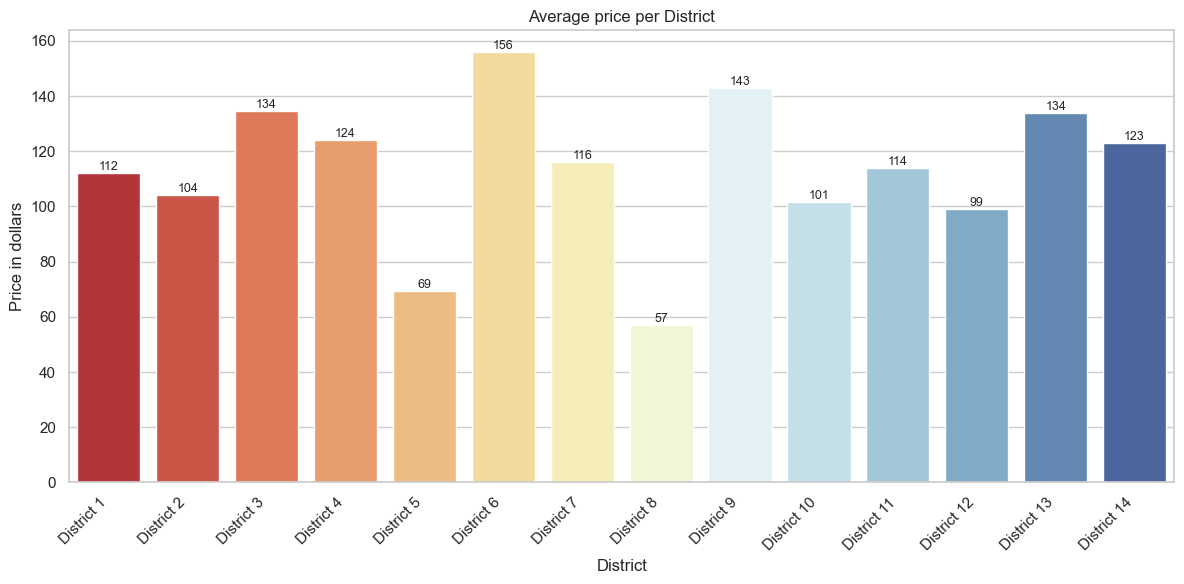

In [27]:
#plot style
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    data=avg_price_per_hood,
    x='neighbourhood_cleansed',
    y='average_price',
    palette='RdYlBu',
    hue = 'neighbourhood_cleansed',
    legend = False
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels on top of bars
for bar in barplot.patches:
    height = bar.get_height()
    barplot.annotate(f'{int(height)}',
                     (bar.get_x() + bar.get_width() / 2, height),
                     ha='center', va='bottom', fontsize=9)

plt.title('Average price per District')
plt.xlabel('District')
plt.ylabel('Price in dollars')
plt.tight_layout()

# Save the plot
plt.savefig('average_price_per_district.png', dpi=300)

plt.show()

In [28]:
### Insights based on median prices by neighborhood

insights = """
- District 6 stands out as the most expensive neighborhood with a median price of $156, indicating that typical listings here tend to be pricier compared to other districts.\n
- District 8 is the least expensive neighborhood, with a median price of $57, suggesting more affordable accommodation options for travelers.\n
- Several districts, such as District 3 ($134.5), District 9 ($143), and District 13 ($134), have relatively high median prices, indicating premium or mid-to-high range listings.\n
- Districts like District 5 ($69.5) and District 12 ($99) offer more budget-friendly options, making them attractive for cost-conscious travelers.\n
- Overall, the median price distribution reflects a diverse market where travelers can find a wide range of price options depending on the neighborhood.\n
- Using median prices provides a more balanced view of typical listing costs by minimizing the effect of outliers, giving travelers and hosts a clearer understanding of the usual price landscape.\n
"""
print(insights)


- District 6 stands out as the most expensive neighborhood with a median price of $156, indicating that typical listings here tend to be pricier compared to other districts.

- District 8 is the least expensive neighborhood, with a median price of $57, suggesting more affordable accommodation options for travelers.

- Several districts, such as District 3 ($134.5), District 9 ($143), and District 13 ($134), have relatively high median prices, indicating premium or mid-to-high range listings.

- Districts like District 5 ($69.5) and District 12 ($99) offer more budget-friendly options, making them attractive for cost-conscious travelers.

- Overall, the median price distribution reflects a diverse market where travelers can find a wide range of price options depending on the neighborhood.

- Using median prices provides a more balanced view of typical listing costs by minimizing the effect of outliers, giving travelers and hosts a clearer understanding of the usual price landscape.




### Price Segmentation

Importing get_price_quantiles and classify_price functions from my eda_summary module stored in the project directory

In [29]:
from eda_summary import get_price_quantiles, classify_by_quantile

In [30]:
quantiles = get_price_quantiles(new_listings)

In [31]:
from eda_summary import classify_by_quantile

In [32]:
avg_price_per_hood['category'] = avg_price_per_hood['average_price'].apply(lambda p: classify_by_quantile(p, quantiles))


In [33]:
# grouping listings into price classes

print(avg_price_per_hood)

   neighbourhood_cleansed  average_price   category
0              District 1          112.0    Low-mid
1              District 2          104.0    Low-mid
2              District 3          134.5  Mid-range
3              District 4          124.0  Mid-range
4              District 5           69.5     Budget
5              District 6          156.0  Mid-range
6              District 7          116.0  Mid-range
7              District 8           57.0     Budget
8              District 9          143.0  Mid-range
9             District 10          101.5    Low-mid
10            District 11          114.0    Low-mid
11            District 12           99.0    Low-mid
12            District 13          134.0  Mid-range
13            District 14          123.0  Mid-range


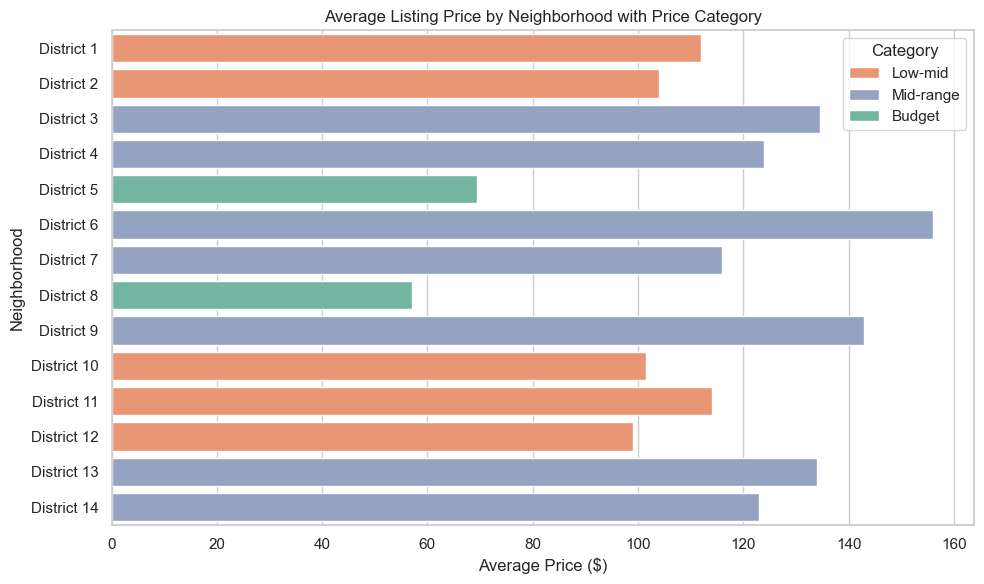

In [34]:
palette = {'Budget': '#66c2a5', 'Low-mid': '#fc8d62', 'Mid-range': '#8da0cb'}



plt.figure(figsize=(10, 6))
sns.barplot(
    data=avg_price_per_hood,
    y='neighbourhood_cleansed',
    x='average_price',
    hue='category',
    dodge=False,
    palette=palette
)
plt.title('Average Listing Price by Neighborhood with Price Category')
plt.xlabel('Average Price ($)')
plt.ylabel('Neighborhood')
plt.legend(title='Category')
plt.tight_layout()
plt.savefig('Average_Listing_Price_by_Neighborhood_with_Price_Category.png', dpi=300)
plt.show()

In [37]:
# Insights from Airbnb listing categories per neighbourhood


insights = """
### Category Distribution Across Neighborhoods

1. **Mid-range Dominance**:
   - The majority of neighborhoods (7 out of 14) fall into the **Mid-range** category, with average prices between roughly 120–160.
   - These neighborhoods include: Districts 3, 4, 6, 7, 9, 13, and 14.
   - This suggests that **mid-tier pricing is the most common segment** in the city.

2. **Low-Mid Tier Neighborhoods**:
   - Districts 1, 2, 10, 11, and 12 have listings in the **Low-mid** category (just above budget but below mid-range).
   - These areas may appeal to **budget-conscious travelers** seeking decent comfort without luxury.

3. **Budget Listings**:
   - Only **District 5 and District 8** fall under the **Budget** category.
   - These areas could attract **price-sensitive guests** or backpackers.

---

### Actionable Implications

- **For Travelers**:
  - Travelers on a tight budget should consider **District 5 or 8**.
  - Those looking for balanced cost and comfort have a **wide choice in Mid-range areas**.

- **For Hosts**:
  - Hosts in **Low-mid** areas may consider **value-adding amenities** to compete with slightly higher-priced neighbors.
  - Hosts in **Budget** areas may benefit from **highlighting affordability** in listings and offering essential services.

- **For Policy and Marketing**:
  - The city’s tourism body could **market districts by pricing tier** — for example, promoting mid-range districts for families and working professionals, while promoting budget zones for youth and solo travelers.
"""

print(insights)



### Category Distribution Across Neighborhoods

1. **Mid-range Dominance**:
   - The majority of neighborhoods (7 out of 14) fall into the **Mid-range** category, with average prices between roughly 120–160.
   - These neighborhoods include: Districts 3, 4, 6, 7, 9, 13, and 14.
   - This suggests that **mid-tier pricing is the most common segment** in the city.

2. **Low-Mid Tier Neighborhoods**:
   - Districts 1, 2, 10, 11, and 12 have listings in the **Low-mid** category (just above budget but below mid-range).
   - These areas may appeal to **budget-conscious travelers** seeking decent comfort without luxury.

3. **Budget Listings**:
   - Only **District 5 and District 8** fall under the **Budget** category.
   - These areas could attract **price-sensitive guests** or backpackers.

---

### Actionable Implications

- **For Travelers**:
  - Travelers on a tight budget should consider **District 5 or 8**.
  - Those looking for balanced cost and comfort have a **wide choice in Mid-ran

**How do prices vary by season or day of the week?**

we want to identify time based trends

In [38]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   listing_id      1048575 non-null  float64
 1   date            1048575 non-null  object 
 2   available       1048575 non-null  object 
 3   price           1048575 non-null  object 
 4   adjusted_price  0 non-null        float64
 5   minimum_nights  1048575 non-null  int64  
 6   maximum_nights  1048575 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 56.0+ MB


In [39]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,61878.0,4/17/2025,f,$75.00,NaN,30,1125
1,61878.0,4/18/2025,f,$75.00,NaN,30,1125
2,61878.0,4/19/2025,f,$75.00,NaN,30,1125
3,61878.0,4/20/2025,f,$75.00,NaN,30,1125
4,61878.0,4/21/2025,f,$75.00,NaN,30,1125


In [41]:
calen = calendar.copy()

## making the 'Price' variable numeric

In [42]:
calen['price'] = calen['price'].replace('[\$,]', '', regex=True).str.replace(',', '', regex=True).astype(float)


In [43]:
calen.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,61878.0,4/17/2025,f,75.0,NaN,30,1125
1,61878.0,4/18/2025,f,75.0,NaN,30,1125
2,61878.0,4/19/2025,f,75.0,NaN,30,1125
3,61878.0,4/20/2025,f,75.0,NaN,30,1125
4,61878.0,4/21/2025,f,75.0,NaN,30,1125


In [44]:
#filtering out the available rooms
available_calendar = calen[calen['available'] == 't']

In [45]:
available_calendar = available_calendar.copy()

In [46]:
available_calendar['date'] = pd.to_datetime(available_calendar['date'])

In [47]:
available_calendar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 637332 entries, 13 to 1048574
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   listing_id      637332 non-null  float64       
 1   date            637332 non-null  datetime64[ns]
 2   available       637332 non-null  object        
 3   price           637332 non-null  float64       
 4   adjusted_price  0 non-null       float64       
 5   minimum_nights  637332 non-null  int64         
 6   maximum_nights  637332 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 38.9+ MB


Adding Month and Day of the week columns for time series analysis

In [48]:
# Extract month and day of week
available_calendar['month'] = available_calendar['date'].dt.month
available_calendar['day_of_week'] = available_calendar['date'].dt.day_name()

In [49]:
monthly = available_calendar.groupby('month')

In [50]:
avg_monthly_price = monthly['price'].median().sort_values()

In [51]:
avg_monthly_p = avg_monthly_price.reset_index()

In [213]:
# Calculating the average listing price based on the booking month
avg_monthly_p.to_csv('avg_price_per_month.csv', index=False)

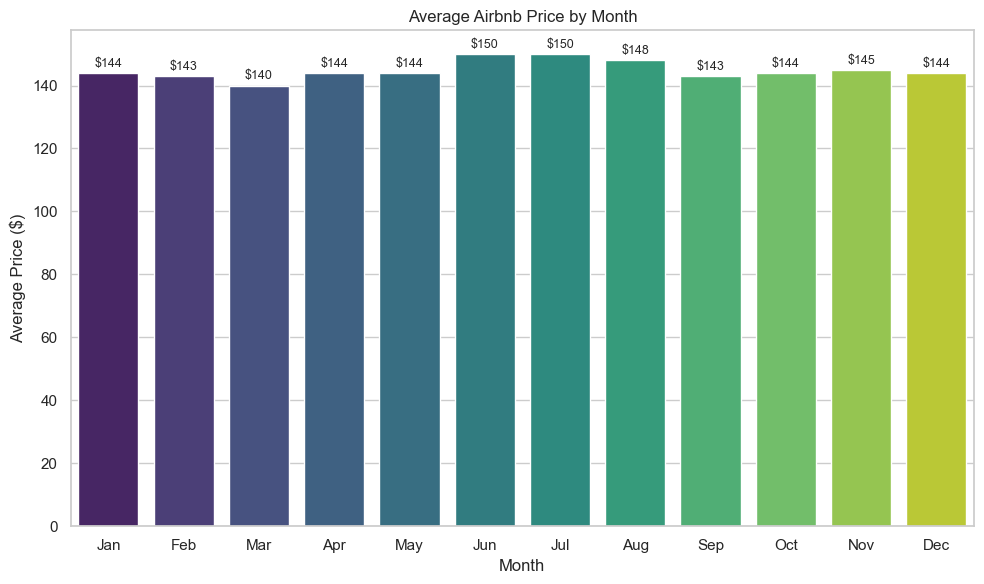

In [52]:
#map numeric month to names for better readability
month_order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_map = dict(zip(month_order, month_names))
avg_monthly_p['month_name'] = avg_monthly_p['month'].map(month_map)

# Sort by month order
avg_monthly_p = avg_monthly_p.sort_values(by='month')

# Plotting
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=avg_monthly_p, x='month_name', y='price', palette='viridis',hue='month_name',legend=False)

# Add value labels
for bar in barplot.patches:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        f"${height:.0f}",
        ha='center',
        va='bottom',
        fontsize=9
    )

# Titles and labels
plt.title('Average Airbnb Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Price ($)')
plt.tight_layout()

# Save the plot before showing it
plt.savefig("average_price_by_month.png", dpi=300)
plt.show()

In [53]:
# Insights
insights = """
Insights:
1. Most months cluster around $143–$145, indicating stable pricing.
2. June and July have the highest median prices at $150 — likely due to summer demand.
3. March has the lowest median price ($140), suggesting a low-demand period.
4. Slight increases in November may reflect early holiday travel.

Implications:
- Travelers: March and February offer the lowest prices.
- Hosts: Consider raising prices in peak months (June–August).
"""

print(insights)


Insights:
1. Most months cluster around $143–$145, indicating stable pricing.
2. June and July have the highest median prices at $150 — likely due to summer demand.
3. March has the lowest median price ($140), suggesting a low-demand period.
4. Slight increases in November may reflect early holiday travel.

Implications:
- Travelers: March and February offer the lowest prices.
- Hosts: Consider raising prices in peak months (June–August).



In [74]:
# Suggestions for Further Analysis
# Analyze price volatility (standard deviation) per month to measure price consistency.

# Segment by property type or location to see if these trends differ.

# Compare with occupancy rates or revenue per month to assess profitability.

In [54]:
#Finding the average price of lisitng in a week day and how they vary from day to day
grouped = (
    available_calendar.groupby('day_of_week')['price']
    .agg(['median', 'std'])  # median and standard deviation
    .reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])  # correct order
    .reset_index()
)

In [55]:
price_by_day = grouped
print(price_by_day)

  day_of_week  median         std
0      Monday   145.0  938.781389
1     Tuesday   145.0  939.420953
2   Wednesday   145.0  936.025811
3    Thursday   144.0  946.111180
4      Friday   144.0  955.495559
5    Saturday   144.0  953.999160
6      Sunday   145.0  942.598348


In [216]:
price_by_day.to_csv('price_by_day.csv', index=False)

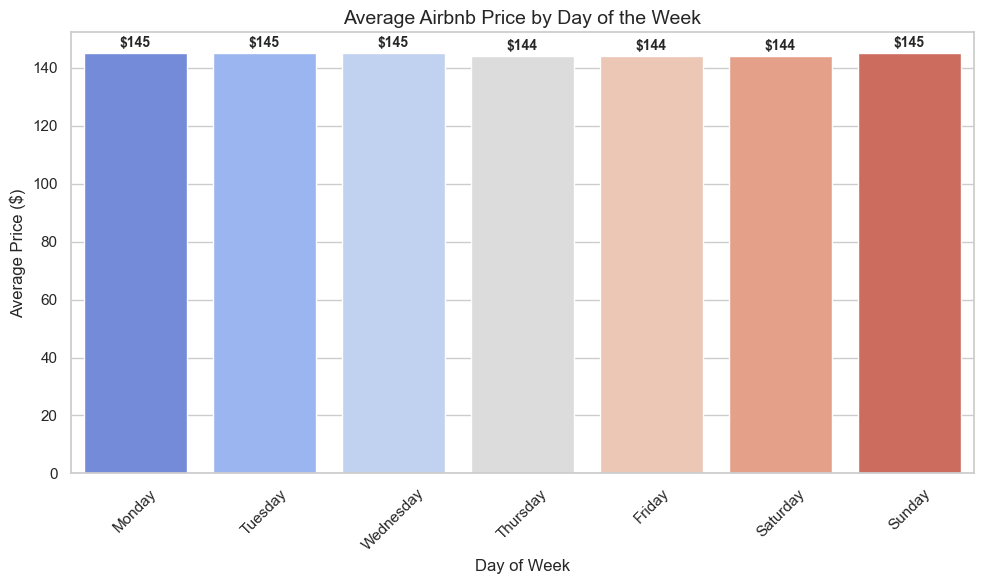

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Barplot WITHOUT passing yerr (Seaborn handles mean directly)
barplot = sns.barplot(
    data=price_by_day,
    x='day_of_week',
    y='median',
    palette='coolwarm',
    hue = 'day_of_week',
    legend = False
)

# Add value labels manually
for bar in barplot.patches:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        f"${height:.0f}",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

plt.title('Average Airbnb Price by Day of the Week', fontsize=14)
plt.xlabel('Day of Week')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("avg_price_by_day_with_error.png", dpi=300, bbox_inches='tight')
plt.show()


**Analysis**
This chart shows that average Airbnb prices rise toward weekends, with Friday and Saturday being the most expensive. The error bars indicate price variation — weekends also tend to have greater price spread, suggesting dynamic pricing based on demand.

### Insights: Median Prices & Variability by Day of the Week

- **Consistent Median Prices Throughout the Week:**  
  The median Airbnb price remains stable across all days, ranging narrowly from **144 to 145 dollars**. This indicates that hosts generally maintain similar base prices regardless of the day of the week.

- **High Price Variability Regardless of the Day:**  
  The standard deviation is consistently high (around **936 to 955 dollars**), showing a wide range of listing prices on each day. This reflects the presence of both budget and luxury listings throughout the week.

- **Implications for Travelers:**  
  Travelers can expect similar average costs regardless of the day they book. However, due to high variability, price-sensitive travelers should carefully compare listings to find the best deals.

- **Implications for Hosts:**  
  Hosts might consider adopting dynamic pricing strategies that adjust prices based on demand fluctuations, as the current pricing appears largely static across days.


**For future analysis like price prediction and the like we find the distribution of price and prepare it for modeling**


📊 Summary for 'listing_id':
count    6.373320e+05
mean     4.608439e+17
std      4.165733e+17
min      6.187800e+04
25%      4.649540e+07
50%      6.129820e+17
75%      8.580180e+17
max      1.049850e+18
Name: listing_id, dtype: float64
Skewness: -0.08


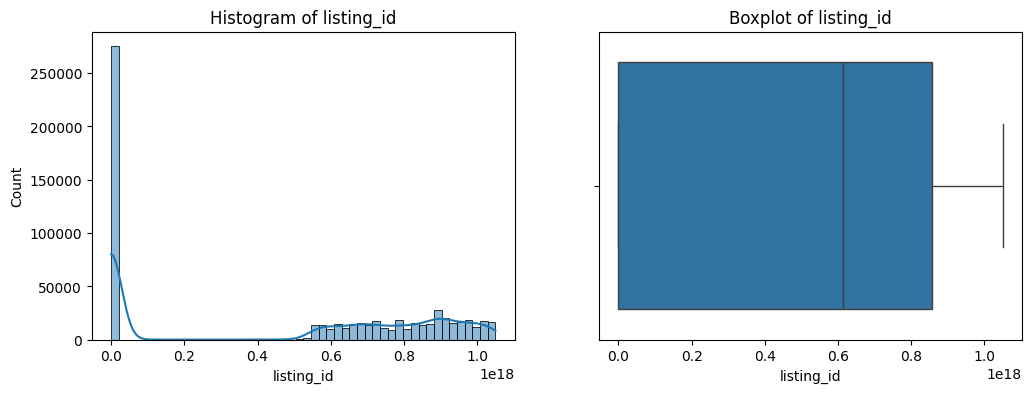

🔁 Log-transformed summary for 'listing_id':
count    637332.000000
mean         30.907900
std          11.834800
min          11.032920
25%          17.654864
50%          40.957112
75%          41.293401
max          41.495179
Name: listing_id, dtype: float64


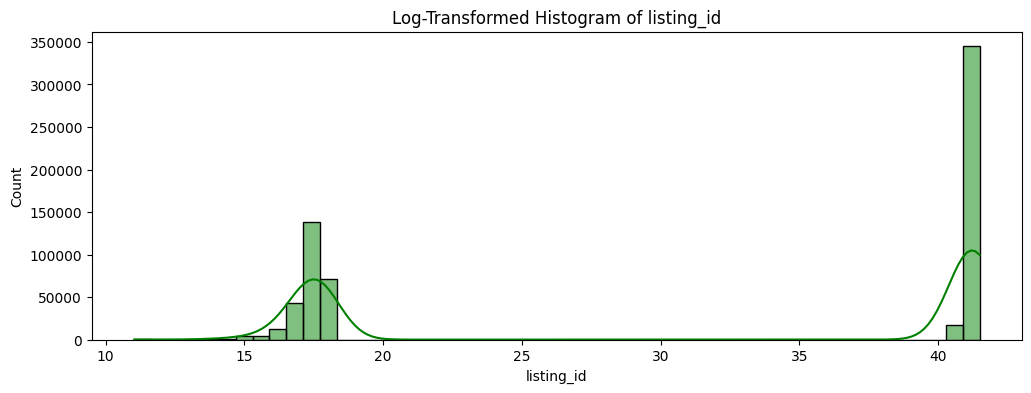


📊 Summary for 'price':
count    637332.000000
mean        326.543558
std         944.556007
min          10.000000
25%          90.000000
50%         145.000000
75%         280.000000
max       10000.000000
Name: price, dtype: float64
Skewness: 9.30


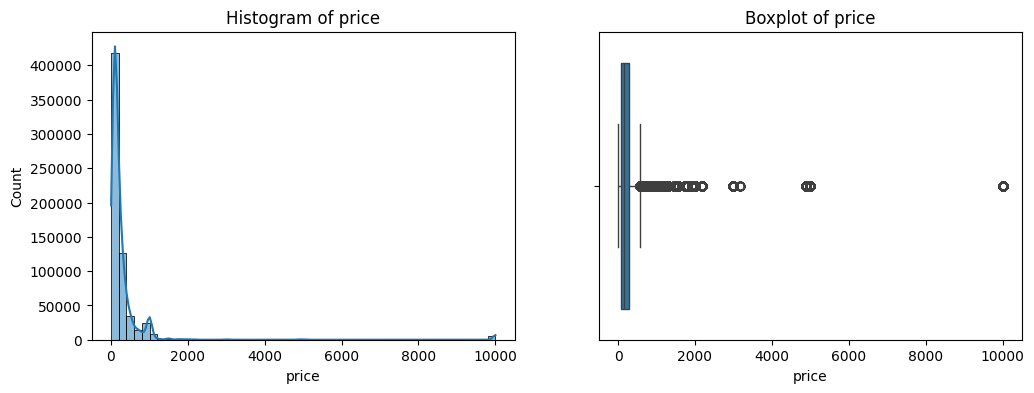

🔁 Log-transformed summary for 'price':
count    637332.000000
mean          5.131221
std           0.913488
min           2.302585
25%           4.499810
50%           4.976734
75%           5.634790
max           9.210340
Name: price, dtype: float64


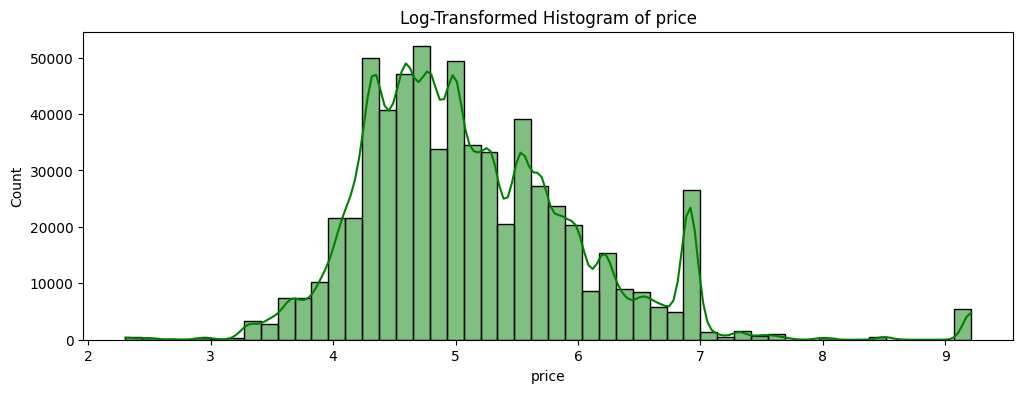


📊 Summary for 'adjusted_price':
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: adjusted_price, dtype: float64
Skewness: nan


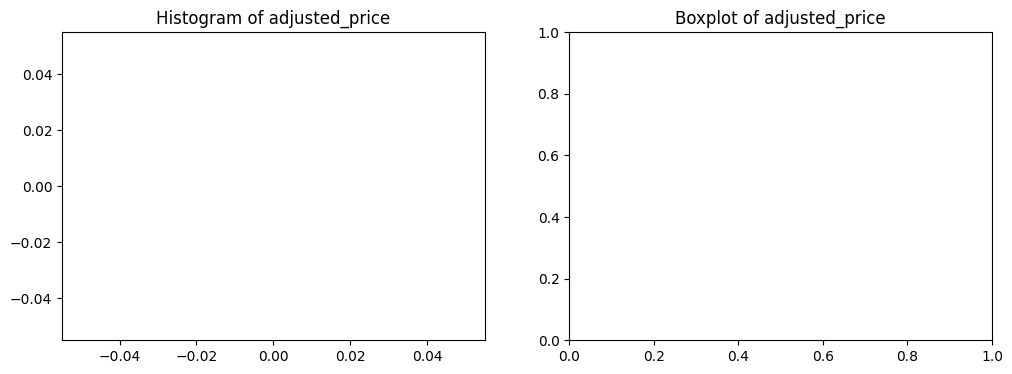

🔁 Log-transformed summary for 'adjusted_price':
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: adjusted_price, dtype: float64


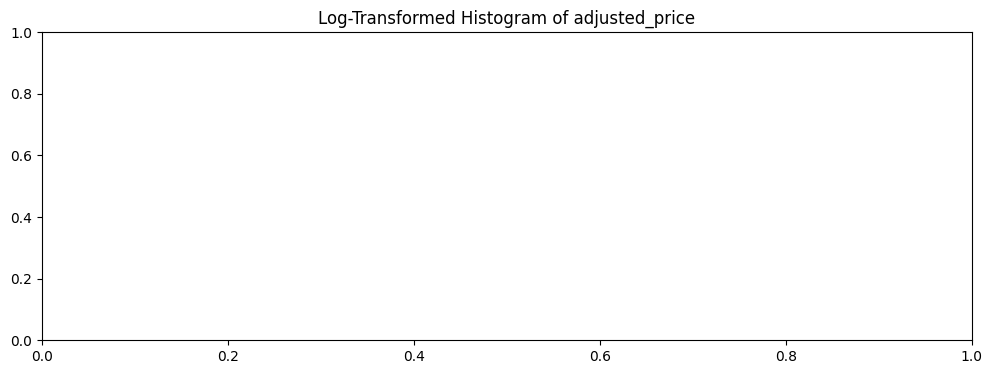


📊 Summary for 'minimum_nights':
count    637332.000000
mean         11.305298
std          24.409818
min           1.000000
25%           1.000000
50%           2.000000
75%          14.000000
max         365.000000
Name: minimum_nights, dtype: float64
Skewness: 7.43


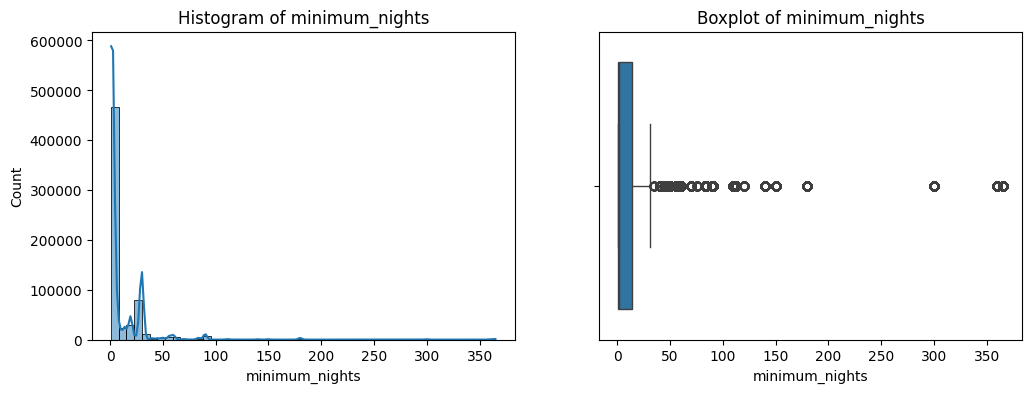

🔁 Log-transformed summary for 'minimum_nights':
count    637332.000000
mean          1.375087
std           1.336126
min           0.000000
25%           0.000000
50%           0.693147
75%           2.639057
max           5.899897
Name: minimum_nights, dtype: float64


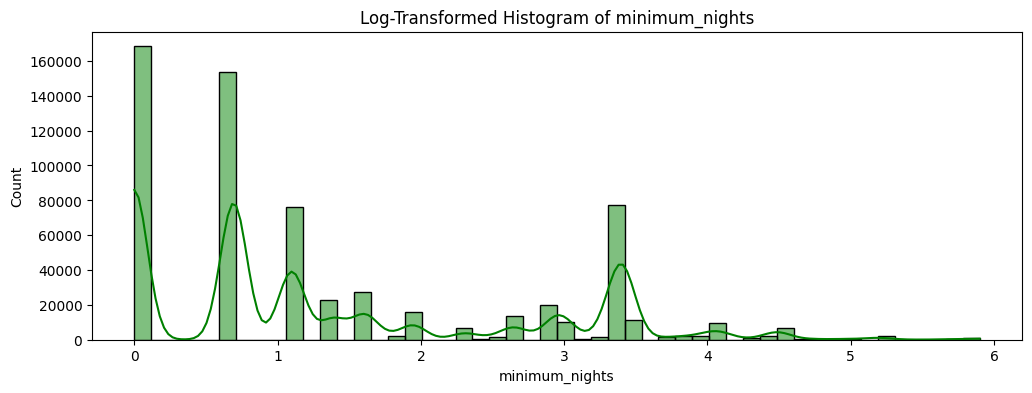


📊 Summary for 'maximum_nights':
count    6.373320e+05
mean     6.962172e+06
std      1.220695e+08
min      1.000000e+00
25%      3.650000e+02
50%      1.125000e+03
75%      1.125000e+03
max      2.147484e+09
Name: maximum_nights, dtype: float64
Skewness: 17.48


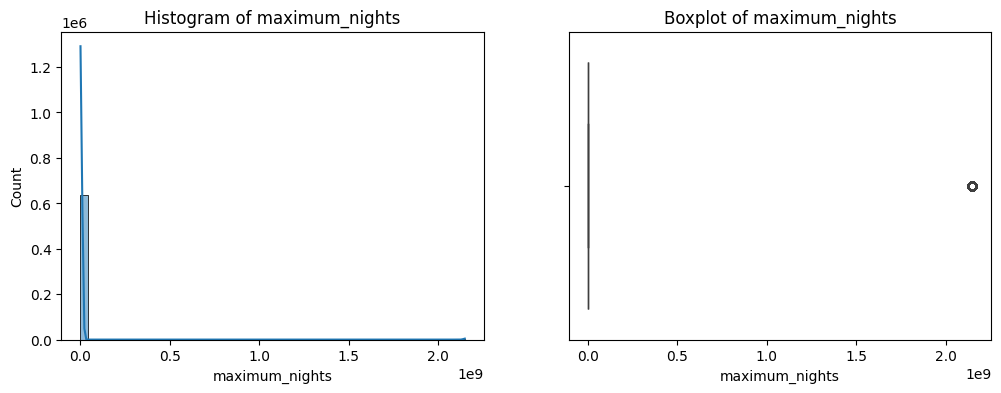

🔁 Log-transformed summary for 'maximum_nights':
count    637332.000000
mean          6.427937
std           1.383484
min           0.000000
25%           5.899897
50%           7.025538
75%           7.025538
max          21.487563
Name: maximum_nights, dtype: float64


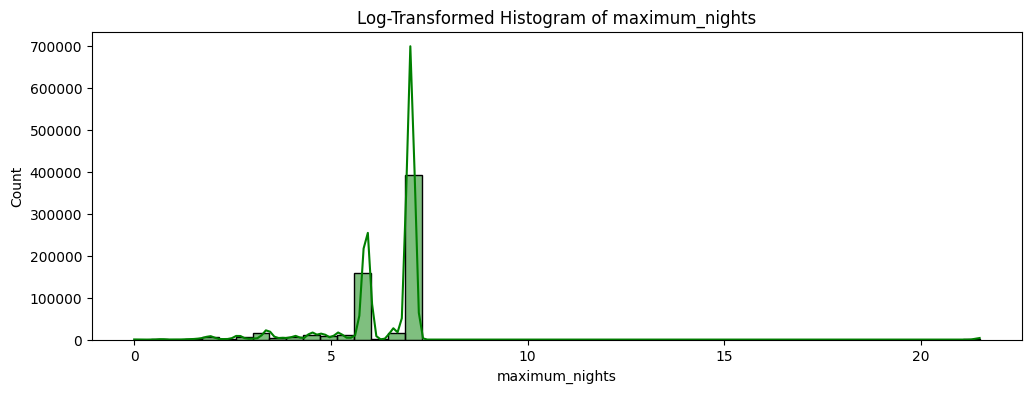


📊 Summary for 'month':
count    637332.000000
mean          6.741675
std           3.404699
min           1.000000
25%           4.000000
50%           7.000000
75%          10.000000
max          12.000000
Name: month, dtype: float64
Skewness: -0.12


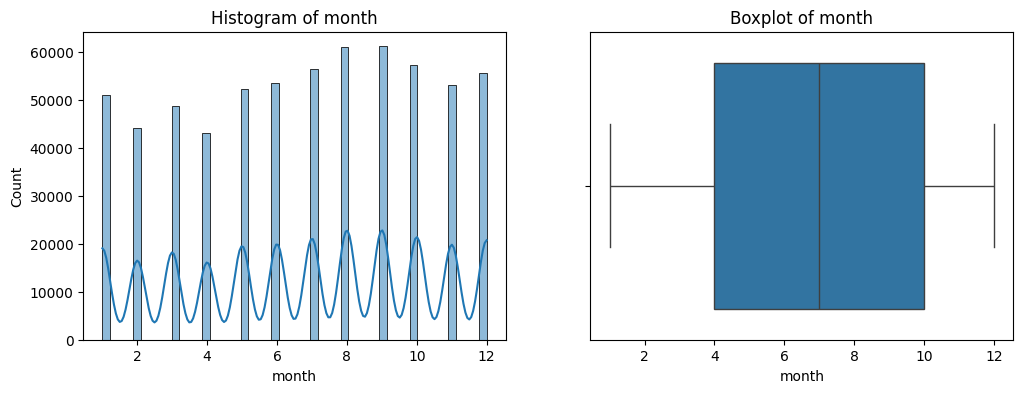

🔁 Log-transformed summary for 'month':
count    637332.000000
mean          1.713548
std           0.711975
min           0.000000
25%           1.386294
50%           1.945910
75%           2.302585
max           2.484907
Name: month, dtype: float64


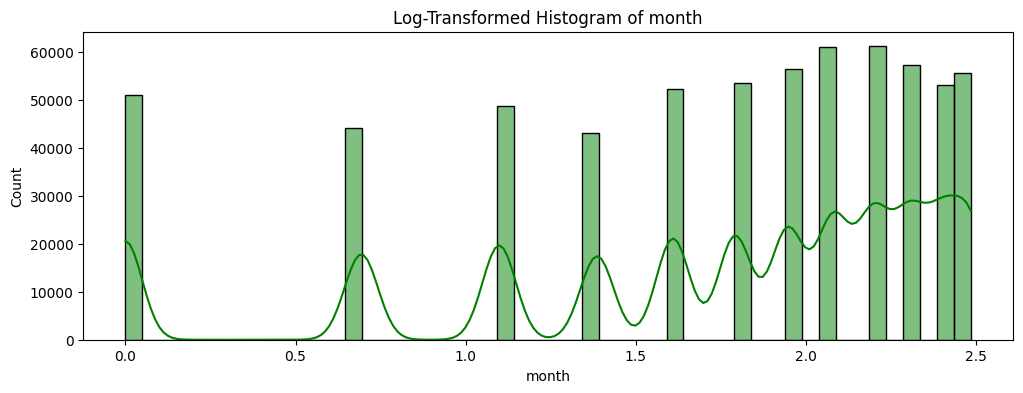

In [33]:
from eda_summary import summarize_numeric_distributions

# calling a summary functioon to analyze the type of distribution of numeric variables present in the dataframe
summarize_numeric_distributions(available_calendar, log_transform=True, exclude_zeros=True)


In [1]:
from eda_summary import save_num_distributions

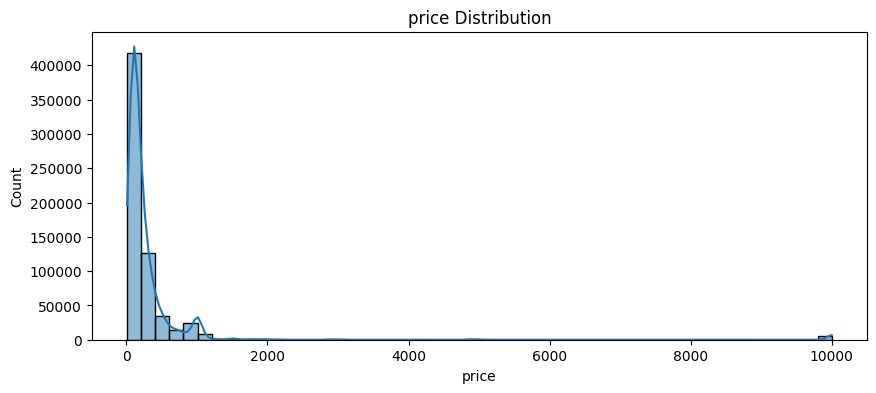

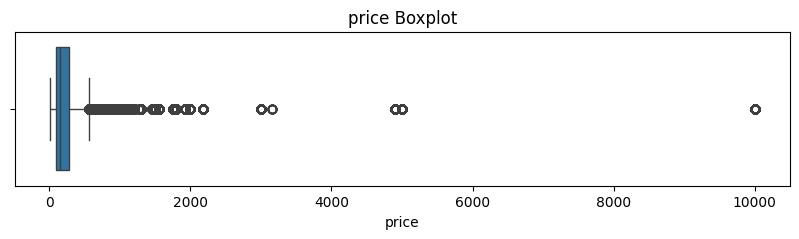

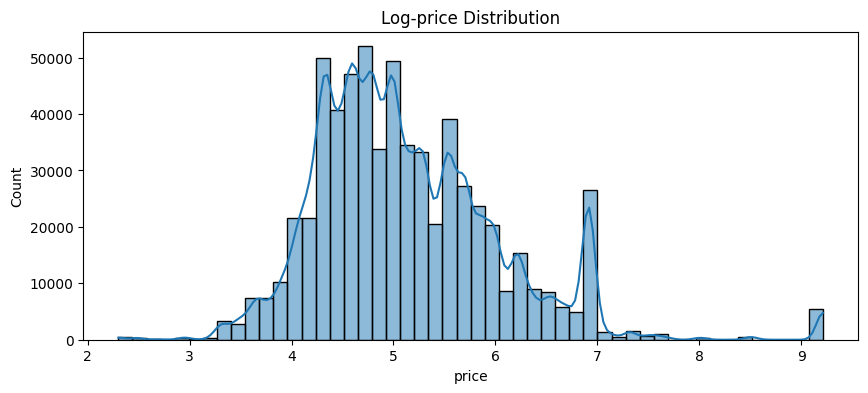

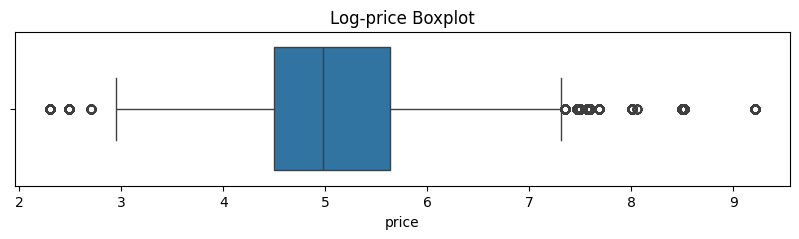

In [38]:
save_numeric_distributions(available_calendar, 'price', save=True, prefix='price_viz')

**Price analysis**

**1. Raw Price Distribution**
This chart shows the distribution of listing prices in their original scale.

📈 Histogram:

Most listings are priced between 50 dollars and 200 dollars. However, the chart shows a long right tail, with some listings priced over $1000 per night. These high-end or mispriced listings pull the average price upwards.

📦 Boxplot:

The median price is around $120. The boxplot shows many outliers, indicating a large number of listings priced far above the average.

📊 Summary Stats:

Mean is higher than the median due to skew.

High standard deviation suggests wide price variability.

Maximum price is disproportionately high.

🧠 Insight:

This skewed distribution affects both descriptive analysis and predictive modeling. For example, mean price can be misleading, and visualizations may not reveal typical listing behavior.




**2. Log-Transformed Price Distribution**
To reduce skewness and improve interpretability, a log transformation was applied to the price variable.

📈 Histogram:

The log-transformed distribution is more bell-shaped and nearly symmetrical, with the majority of values now centered around a clear peak.

📦 Boxplot:

Outliers are still visible, but less extreme. The bulk of listings now fall within a tighter, more informative range.

📊 Summary Stats:

Mean and median are closer together.

Standard deviation is reduced.

Extreme values are compressed, making trends easier to see.

🧠 Insight:

The log transformation helps normalize the data and makes it more suitable for visual and statistical analysis. It reduces the influence of outliers while preserving relative price differences.

### Neighbourhoods with most listings

In [76]:
#grouping by neighbourhood_cleansed where we pair with listing id

In [57]:
grouped = (listings.groupby('neighbourhood_cleansed')['id'].count()
           .reindex(['District 1', 'District 2', 'District 3', 'District 4', 'District 5', 'District 6', 'District 7', 'District 8', 'District 9', 'District 10', 'District 11', 'District 12', 'District 13', 'District 14'])  # correct order
    .reset_index())


In [149]:
grouped

,neighbourhood_cleansed,id
0,District 1,535
1,District 2,1699
2,District 3,101
3,District 4,166
4,District 5,42
5,District 6,332
6,District 7,239
7,District 8,83
8,District 9,180
9,District 10,171


In [59]:
grouped.rename(columns={'id': 'number_of_listings'}, inplace=True)

In [60]:
listing_per_hood = grouped
listing_per_hood

,neighbourhood_cleansed,number_of_listings
0,District 1,535
1,District 2,1699
2,District 3,101
3,District 4,166
4,District 5,42
5,District 6,332
6,District 7,239
7,District 8,83
8,District 9,180
9,District 10,171


Plotting the above statistics

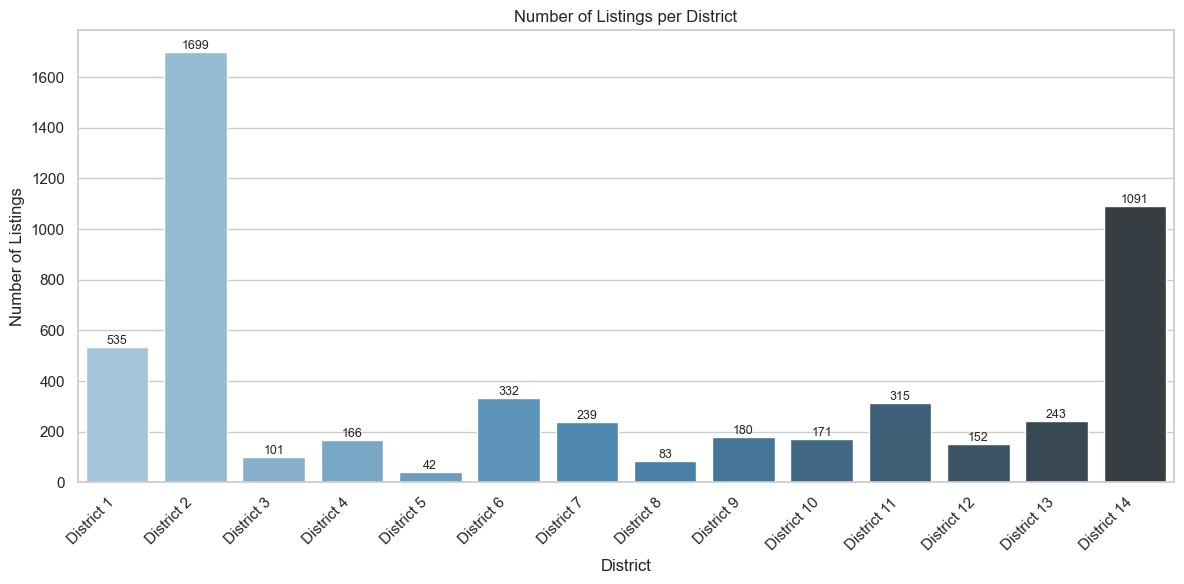

In [61]:
# Set plot style
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    data=listing_per_hood,
    x='neighbourhood_cleansed',
    y='number_of_listings',
    palette='Blues_d',
    hue = 'neighbourhood_cleansed',
    legend = False
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels on top of bars
for bar in barplot.patches:
    height = bar.get_height()
    barplot.annotate(f'{int(height)}',
                     (bar.get_x() + bar.get_width() / 2, height),
                     ha='center', va='bottom', fontsize=9)

plt.title('Number of Listings per District')
plt.xlabel('District')
plt.ylabel('Number of Listings')
plt.tight_layout()

# Save the plot
plt.savefig('listings_per_district.png', dpi=300)

plt.show()

In [217]:
listing_per_hood.to_csv('total_listings_per_district.csv', index=False)

###  Insights: Distribution of Listings by Neighborhood

- **High Concentration Areas:**  
  - **District 2** has the **highest number of listings (1,699)**, followed by **District 14 (1,091)** and **District 1 (535)**.  
    These neighborhoods likely represent tourism hotspots or areas with active Airbnb markets.

- **Moderately Listed Areas:**  
  - **Districts 6 (332)**, **11 (315)**, **13 (243)**, and **7 (239)** have a moderate number of listings, indicating vibrant but potentially more niche local markets.

- **Low Listing Neighborhoods:**  
  - **District 5 (42)**, **District 8 (83)**, and **District 3 (101)** show the **fewest listings**, which may suggest more residential areas, lower demand, or stricter rental regulations.

---

###  Implications

- **For Travelers:**  
  Districts with higher listings offer more variety and potentially competitive pricing. Consider Districts 2, 14, or 1 for a broader selection of accommodations.

- **For Hosts:**  
  - Entering less saturated neighborhoods like District 5 or 8 might offer better visibility if demand exists.  
  - In high-listing areas, competition is stronger, so pricing and amenities should be strategically optimized.

- **For City Planners or Policymakers:**  
  The uneven distribution may highlight the need for policies to manage tourism density or regulate Airbnb listings in over-concentrated districts.


**Are certain room types more common in certain neighborhoods?**

In [65]:
cross = pd.crosstab(listings['neighbourhood_cleansed'], listings['room_type'], normalize='index').reset_index()

In [66]:
cross

room_type,neighbourhood_cleansed,Entire home/apt,Hotel room,Private room,Shared room
0,District 1,0.841121,0.000000,0.130841,0.028037
1,District 10,0.754386,0.046784,0.181287,0.017544
2,District 11,0.803175,0.060317,0.136508,0.000000
3,District 12,0.796053,0.000000,0.203947,0.000000
4,District 13,0.913580,0.000000,0.086420,0.000000
5,District 14,0.936755,0.003666,0.059578,0.000000
6,District 2,0.940553,0.004709,0.054149,0.000589
7,District 3,0.712871,0.000000,0.267327,0.019802
8,District 4,0.710843,0.000000,0.289157,0.000000
9,District 5,0.619048,0.000000,0.380952,0.000000


In [67]:
cross_sorted = cross.copy()

In [68]:
cross_sorted['district_number'] = cross_sorted['neighbourhood_cleansed'].str.extract(r'(\d+)').astype(int)
dcross_sortedf = cross_sorted.sort_values(by='district_number').drop(columns='district_number')


In [69]:
cross_sorted = cross_sorted.sort_values(by='district_number')
cross_sorted

room_type,neighbourhood_cleansed,Entire home/apt,Hotel room,Private room,Shared room,district_number
0,District 1,0.841121,0.000000,0.130841,0.028037,1
6,District 2,0.940553,0.004709,0.054149,0.000589,2
7,District 3,0.712871,0.000000,0.267327,0.019802,3
8,District 4,0.710843,0.000000,0.289157,0.000000,4
9,District 5,0.619048,0.000000,0.380952,0.000000,5
10,District 6,0.843373,0.000000,0.156627,0.000000,6
11,District 7,0.610879,0.000000,0.355649,0.033473,7
12,District 8,0.445783,0.000000,0.554217,0.000000,8
13,District 9,0.905556,0.000000,0.094444,0.000000,9
1,District 10,0.754386,0.046784,0.181287,0.017544,10


In [178]:
cross_sorted.to_csv('Room_type1.csv', index=False)

Plot

In [129]:
#Filtering the top 10 neighbourhoods with the most listings

In [72]:
top_neighbourhoods = cross_sorted['neighbourhood_cleansed'].value_counts().head(10).index.tolist()

In [73]:
cross_filtered = cross_sorted[cross_sorted['neighbourhood_cleansed'].isin(top_neighbourhoods)]

In [220]:
cross_filtered.to_csv("top_10_common_listed_properties.csv")

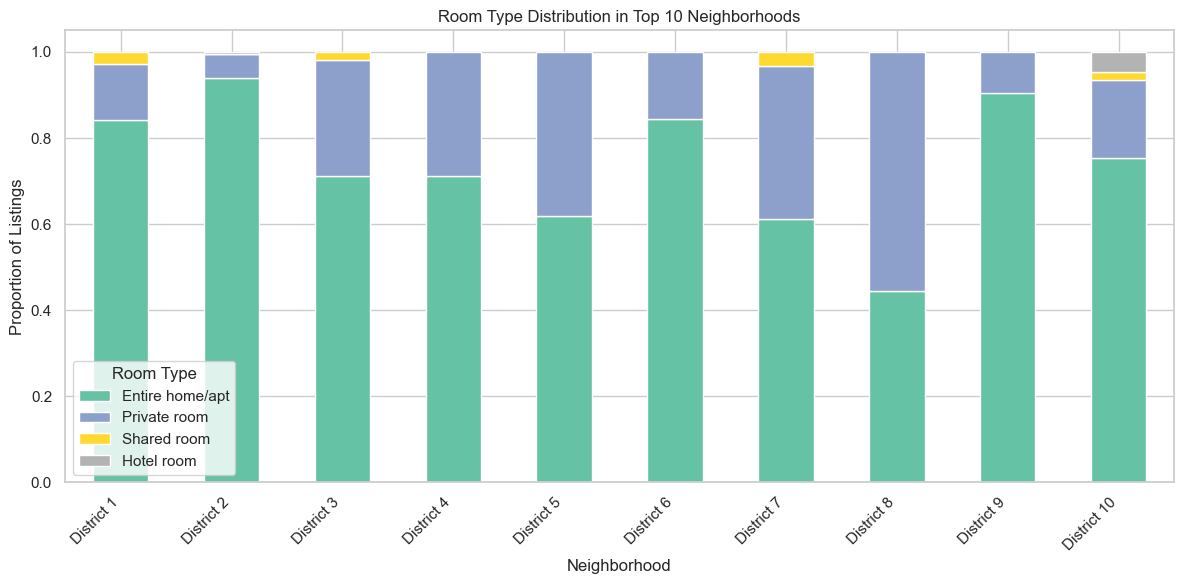

In [74]:
# Assuming cross_filtered is already created and sorted
#I set neighbourhood as index for better plotting
cross_filtered.set_index('neighbourhood_cleansed', inplace=True)

# Plot
cross_filtered[['Entire home/apt', 'Private room', 'Shared room', 'Hotel room']].plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    colormap='Set2'
)

plt.title('Room Type Distribution in Top 10 Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Proportion of Listings')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Room Type')
plt.tight_layout()
plt.savefig('Room_Type_Distribution_by_Neighborhood.png', dpi=300)
plt.show()


###  Insights: Room Type Distribution by Neighborhood

####  Dominance of Entire Home/Apt Listings
- **Entire home/apt** is the dominant room type in most neighborhoods, especially in:
  - **District 2 (94.1%)**, **District 14 (93.7%)**, **District 13 (91.4%)**, and **District 9 (90.6%)**.
  - This suggests these areas are more commercially driven, catering to tourists preferring private, self-contained spaces.

####  Private Room Popularity
- **District 8** stands out, with the **highest proportion of private rooms (55.4%)**.
  - This may reflect a more community-centered or budget-friendly market, appealing to solo travelers or those seeking host interactions.
- Districts 5, 4, and 3 also have significant private room proportions (38.1%, 28.9%, and 26.7% respectively).

####  Hotel Rooms & Shared Rooms
- **Hotel rooms** are largely absent, except in **District 10 (4.7%)** and **District 11 (6.0%)**—indicating limited formal hospitality presence.
- **Shared rooms** are rare overall, with the highest proportion in:
  - **District 7 (3.3%)**, **District 1 (2.8%)**, and **District 3 (2.0%)**, possibly indicating lower-cost shared accommodation offerings.

---

### Implications

- **For Hosts:**  
  - In areas like District 8, offering private rooms may align better with existing demand.  
  - In Districts where entire homes dominate, new hosts may need to compete on amenities or price.

- **For Travelers:**  
  - Those seeking privacy and independence will find abundant options in most districts.
  - Budget travelers or those looking for more local interaction might consider District 8 or 5 for private or shared rooms.

- **For Analysts/Planners:**  
  - The variation in room types reflects different district profiles—commercial vs. residential, tourist-heavy vs. local-focused.


# 📊 Airbnb Listings Analysis Report

This report provides an analytical overview of Airbnb listings across various districts in the city. The focus areas include pricing patterns, listing distributions, room types, and market segmentation based on price categories. Outlier handling and statistical summaries (mean, median) were also applied to derive more accurate insights.

---

## 🎯 Project Objectives
- Understand the pricing structure of Airbnb listings by neighborhood.
- Analyze listing behavior by month and day of the week.
- Classify listings into price segments (budget, mid-range, premium).
- Compare pricing insights before and after removing extreme outliers.
- Provide insights to help hosts and travelers make informed decisions.

---

## 🔍 Key Research Questions
1. What is the typical price range of Airbnb listings in the city, and how does it vary by neighborhood?
2. Are there patterns in listing prices by day of the week or month of the year?
3. Which neighborhoods have the highest and lowest concentrations of listings in different price segments?
4. How does removing extreme outliers (e.g., luxury listings) affect the interpretation of pricing data?
5. What pricing insights can guide travelers or hosts in decision-making?

---

## 🗂️ Dataset Overview
- **Source**: Inside Airbnb
- **Key Columns**: `neighbourhood_cleansed`, `price`, `room_type`, `id`
- **Scope**: Listings across 14 districts with data on room type, price, and availability.

---

## 📌 Outlier Treatment
- Extreme high-end listings (luxury) were removed using the Interquartile Range (IQR) method.
- A second dataset was maintained without these outliers for comparative analysis.
- **Justification**: Mean prices are sensitive to extreme values; medians provide a better central tendency for skewed data.

---

## 💰 Pricing Analysis

### 1. **Price Distribution by District (Before and After Outlier Removal)**
- Districts like **District 2** and **District 14** had the highest listing counts across all price ranges.
- After outlier removal, most high-value segments ($500+) disappeared, giving a clearer picture of typical market prices.

### 2. **Median Prices by Neighborhood**
- **Most expensive (median)**: District 6 (156.0), District 9 (143.0)
- **Least expensive (median)**: District 8 (57.0), District 5 (69.5)

### 3. **Category Segmentation (Budget, Low-Mid, Mid-Range)**
- Budget: Districts 5 and 8
- Mid-range: Districts 3, 6, 9, 13, and 14
- Low-Mid: Districts 1, 2, 10, 11, 12

---

## 📅 Temporal Pricing Trends

### Monthly Median Prices
- **Lowest median**: March (140.0)
- **Highest median**: June and July (150.0)
- Pricing remains relatively stable year-round with slight increases during peak months (summer).

### Weekly Price Stability
- **Median** stays around 144–145 across all days.
- **Standard deviation** is high, suggesting pricing variability (possibly due to a mix of room types and listing qualities).

---

## 🏘️ Listings Volume by District
- Highest number of listings: **District 2 (1699)** and **District 14 (1091)**
- Lowest: **District 5 (42)** and **District 8 (83)**

---

## 🛏️ Room Type Distribution
- **Entire Home/Apt** dominates in almost all districts (especially Districts 2, 13, 14).
- **Private Rooms** are more common in Districts 8 and 5, indicating a potential for budget accommodation.
- **Hotel Rooms** and **Shared Rooms** are very limited across districts.

---

## 📌 Summary Insights
- Median pricing gives a more balanced view of district affordability.
- Outlier removal sharpens the contrast between typical and luxury listings.
- District segmentation based on room types and prices helps travelers identify where to stay and hosts plan market strategies.

---

📍 *Next Steps*: Incorporate visualizations (bar charts, heatmaps) for price distribution, category mapping, and temporal patterns for an interactive portfolio-ready presentation.
